In [63]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['citric acid']= df['citric acid'].replace(0,df['citric acid'].mean())

In [4]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df=df.drop_duplicates()
ProfileReport(df)

In [5]:
x = df.drop(columns= 'quality')
y=df['quality']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.98,random_state=100)
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
967,8.5,0.660,0.200000,2.1,0.097,23.0,113.0,0.99733,3.13,0.48,9.2
782,9.0,0.820,0.050000,2.4,0.081,26.0,96.0,0.99814,3.36,0.53,10.0
317,9.6,0.770,0.120000,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4
1455,6.5,0.900,0.270976,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9
49,5.6,0.310,0.370000,1.4,0.074,12.0,96.0,0.99540,3.32,0.58,9.2
135,8.4,0.745,0.110000,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6
835,7.6,0.665,0.100000,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3
603,13.2,0.460,0.520000,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0
1028,7.2,0.340,0.210000,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1
612,7.5,0.640,0.270976,2.4,0.077,18.0,29.0,0.99650,3.32,0.60,10.0


In [7]:
model=DecisionTreeClassifier()

In [8]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
model.predict(x_test)

array([6, 7, 5, ..., 6, 6, 5], dtype=int64)

In [10]:
model.score(x_test,y_test)

0.48341836734693877

In [11]:
model_entropy = DecisionTreeClassifier(criterion="entropy")


In [12]:
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [13]:
model_entropy.predict(x_test)

array([6, 7, 6, ..., 6, 6, 5], dtype=int64)

In [14]:
model_entropy.score(x_test,y_test)

0.5019132653061225

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
outfile = open('dt_en_meta.dot','w')
tree.export_graphviz(model_entropy,out_file=outfile , feature_names=x.columns)


[Text(0.3076923076923077, 0.9375, 'chlorides <= 0.064\nentropy = 1.451\nsamples = 31\nvalue = [1, 14, 14, 2]\nclass = 5'),
 Text(0.15384615384615385, 0.8125, 'alcohol <= 11.05\nentropy = 0.918\nsamples = 3\nvalue = [0, 0, 1, 2]\nclass = 7'),
 Text(0.07692307692307693, 0.6875, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = 6'),
 Text(0.23076923076923078, 0.6875, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]\nclass = 7'),
 Text(0.46153846153846156, 0.8125, 'sulphates <= 0.535\nentropy = 1.186\nsamples = 28\nvalue = [1, 14, 13, 0]\nclass = 5'),
 Text(0.38461538461538464, 0.6875, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0]\nclass = 5'),
 Text(0.5384615384615384, 0.6875, 'chlorides <= 0.113\nentropy = 1.192\nsamples = 23\nvalue = [1, 9, 13, 0]\nclass = 6'),
 Text(0.46153846153846156, 0.5625, 'residual sugar <= 1.6\nentropy = 1.105\nsamples = 19\nvalue = [1, 5, 13, 0]\nclass = 6'),
 Text(0.3076923076923077, 0.4375, 'free sulfur dioxide <= 19.5\nentropy = 1.0\nsamples = 

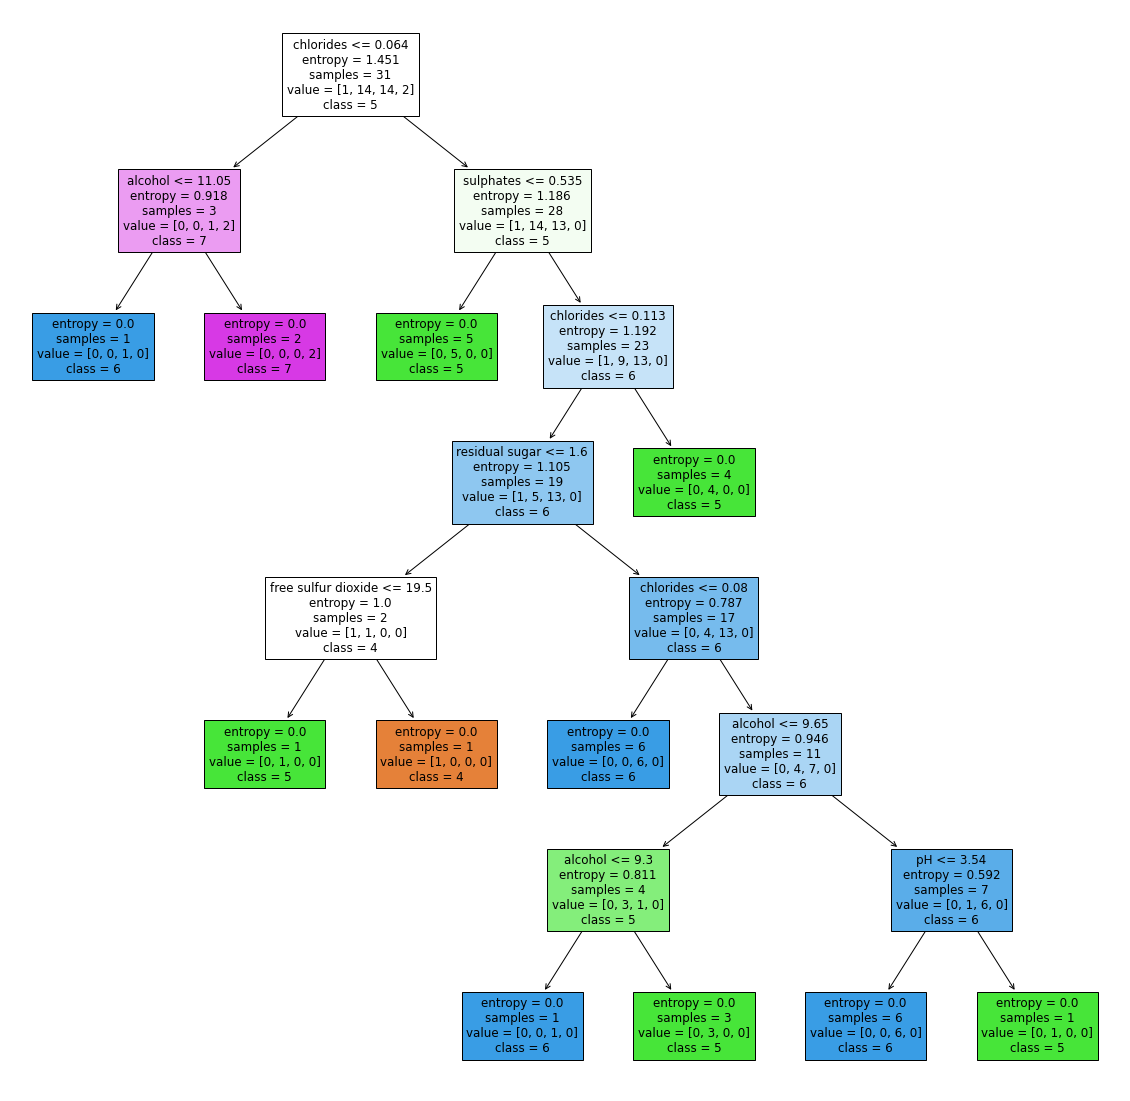

In [17]:
plt.figure(figsize=(20,20))
tree.plot_tree(model_entropy,filled=True, class_names=[str(i) for i in set(y_train)] ,feature_names=x_train.columns)

In [19]:
model_entropy.score(x_test,y_test)

0.5019132653061225

In [20]:
model_entropy.score(x_train,y_train)

1.0

In [24]:
path=model_entropy.cost_complexity_pruning_path(x_train,y_train)

In [25]:
type(path)

sklearn.utils.Bunch

In [30]:
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.06451613, 0.08886734, 0.10468105, 0.10898967,
       0.18110045, 0.19680624, 0.29103251])

In [34]:
dt_modle2 = []
for ccp in ccp_alphas:
    
    dt_m  = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x_train,y_train)
    dt_modle2.append(dt_m)

In [35]:
dt_modle2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.06451612903225806),
 DecisionTreeClassifier(ccp_alpha=0.08886733877946673),
 DecisionTreeClassifier(ccp_alpha=0.10468104831730746),
 DecisionTreeClassifier(ccp_alpha=0.10898967169446283),
 DecisionTreeClassifier(ccp_alpha=0.181100450959211),
 DecisionTreeClassifier(ccp_alpha=0.19680623593250235),
 DecisionTreeClassifier(ccp_alpha=0.2910325073949833)]

In [37]:
train_score = [i.score(x_train,y_train) for i in dt_modle2]

In [38]:
test_score = [i.score(x_test ,y_test) for i in dt_modle2]

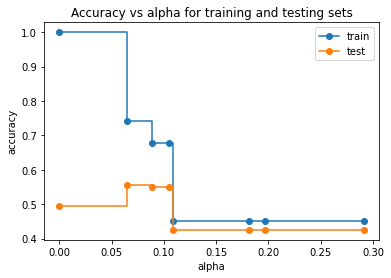

In [40]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [57]:
dt_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha=.1)
dt_model_ccp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.1, random_state=0)

[Text(0.5, 0.75, 'X[10] <= 9.85\ngini = 0.587\nsamples = 31\nvalue = [1, 14, 14, 2]'),
 Text(0.25, 0.25, 'gini = 0.461\nsamples = 16\nvalue = [1, 11, 4, 0]'),
 Text(0.75, 0.25, 'gini = 0.498\nsamples = 15\nvalue = [0, 3, 10, 2]')]

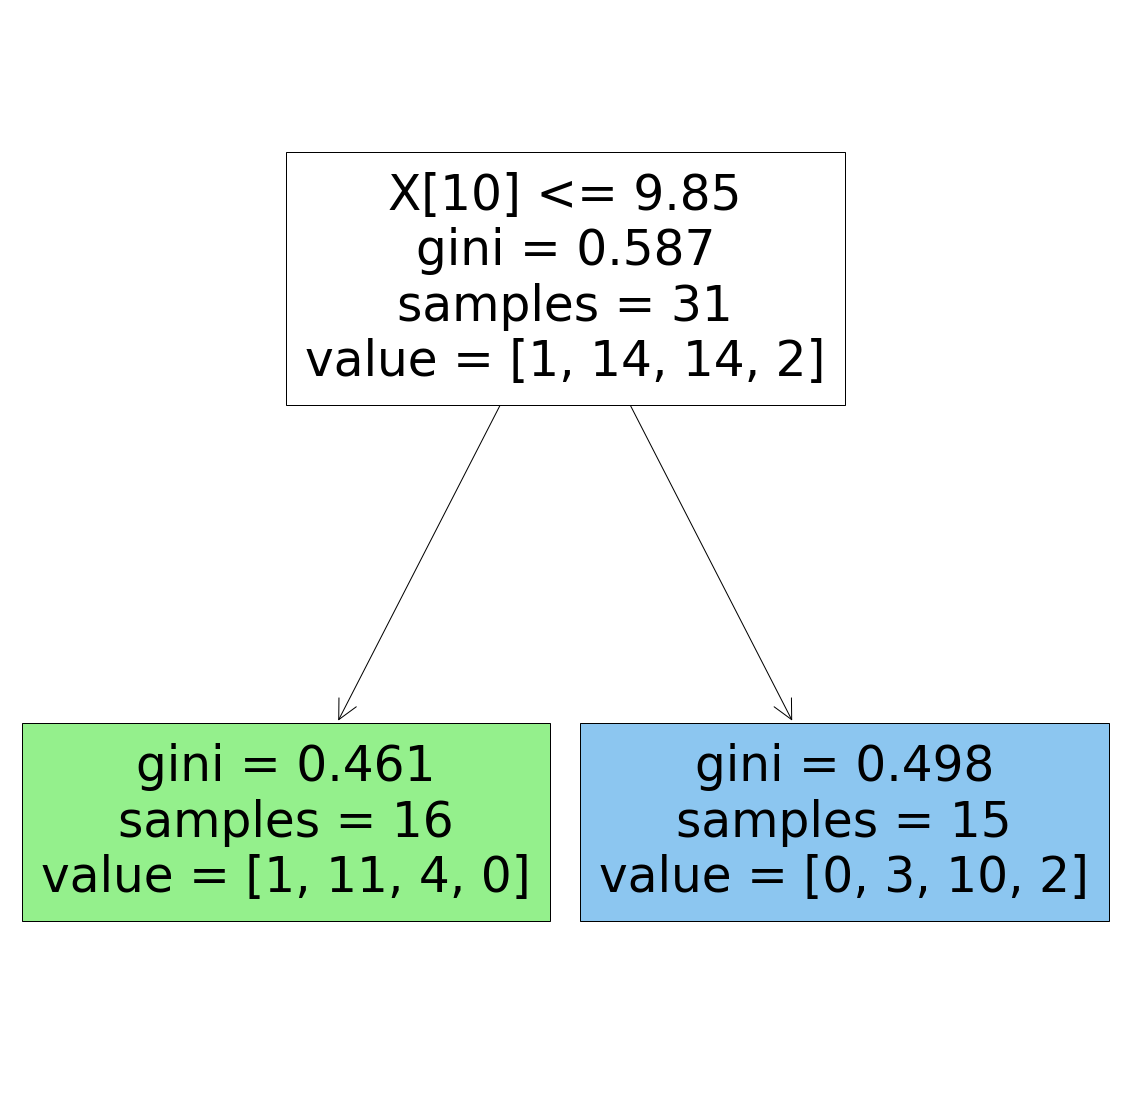

In [58]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [59]:
dt_model_ccp.score(x_train,y_train)

0.6774193548387096

In [60]:
dt_model_ccp.score(x_test,y_test)

0.5510204081632653

In [61]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)
             }

In [67]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 , n_jobs=-1)

In [69]:
grid_ccp.fit(x_test,y_test)
#Takes much tme to process and thus the error

KeyboardInterrupt: 

exception calling callback for <Future at 0x26365dc8580 state=finished returned list>
Traceback (most recent call last):
  File "C:\Users\anjusing\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\anjusing\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\anjusing\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\anjusing\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\anjusing\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users

In [ ]:
grid_ccp.best_params_

In [ ]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy' , max_depth=17 ,min_samples_leaf=1 , min_samples_split=3 , splitter='random',ccp_alpha=0.014)

In [ ]:
dt_cpp_new.fit(x1,y1)

In [ ]:
pred = dt_cpp_new.predict(x_train)

In [ ]:
confusion_matrix(y_train,pred)